<a href="https://colab.research.google.com/github/imperialHCE/theprojects/blob/master/Regression_Analysis_for_Predicting_Sales_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Company_data.csv to Company_data.csv


In [ ]:
import io
adv = pd.read_csv(io.BytesIO(uploaded['Company_data.csv']))

In [ ]:
adv

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
#Shape of our dataset

adv.shape

#info our dataset

adv.info()

#Describe out dataset

adv.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Visualizing the data

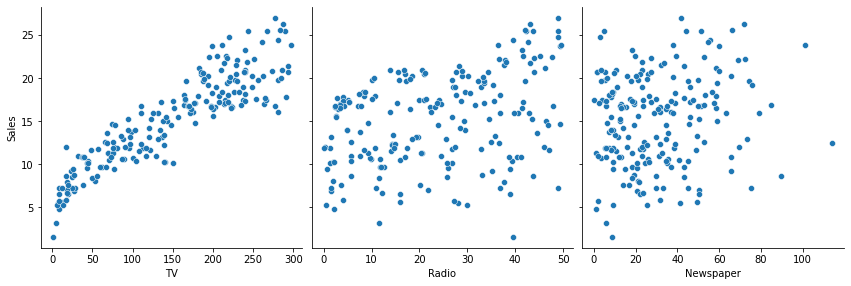

In [ ]:
import matplotlib.pyplot as plt

# Using pairplot we'll visualize the data for correlation

sns.pairplot(adv, x_vars=['TV', 'Radio', 'Newspaper'],
            y_vars='Sales', size=4, aspect=1, kind='scatter')

plt.show()

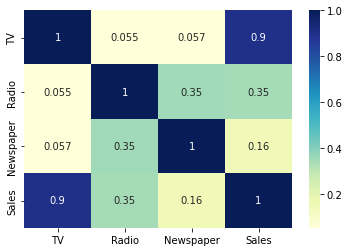

In [ ]:
# Visualizing the data using heatmap
sns.heatmap(adv.corr(), cmap='YlGnBu' , annot=True)
plt.show()

Performing Simple Linear Regression

Creating X and Y First, we’ll assign our feature variable/column TV as X and our target variable Sales as y.

To generalize,

The independent variable represents X, and y represents the target variable in a simple linear regression model.

In [ ]:
X = adv['TV']
y = adv['Sales']

Creating train and test data in 7:3 ratio

In [ ]:
#Spilitting the variables as training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state=100)


In [ ]:
# Take a look at the train dataset
X_train
y_train

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64

Building and training the model

In [ ]:
# Importing Statsmodel.api library from Statsmodel package

import statsmodels.api as sm

# Adding constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [ ]:
# Fitting the regression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [ ]:
#Perfoming a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           1.52e-52
Time:                        06:13:30   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

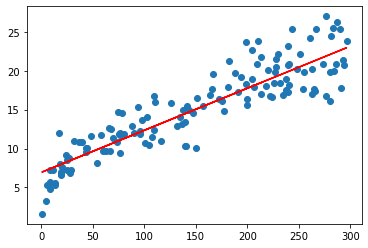

In [ ]:
#Visualizing the regression line

plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

Residual Analysis

error = actual y value - predicted y value

In [ ]:
# Predicting y_value using training data of X
y_train_pred = lr.predict(X_train_sm)

#Creating residuals from the y_train data and predicted y_data

residual = (y_train - y_train_pred)

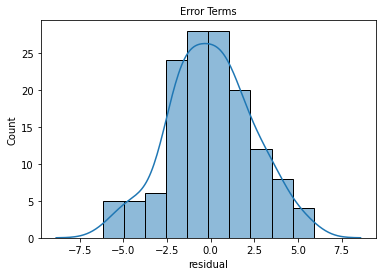

In [ ]:
# Plotting the histogram using residual values

fig = plt.figure()
sns.histplot(residual, kde=True, kde_kws=dict(cut=3))
plt.title('Error Terms', fontsize=10)
plt.xlabel('residual', fontsize=10)
plt.show()

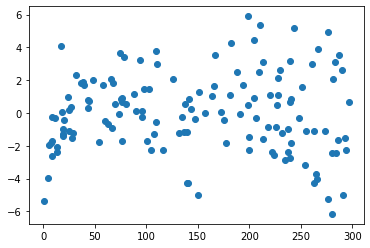

In [ ]:
#Looking for specific patterns in the residuals

plt.scatter(X_train,residual)
plt.show()

Predictions on the Test data and Evaluating the model

In [ ]:
#Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

#Printing the first 15 predicted values
y_test_pred

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
167    18.228745
116    14.541452
96     17.726924
52     18.752384
69     18.774202
164    13.341445
124    19.466933
182    10.014155
154    17.192376
125    11.705073
196    12.086893
194    15.114182
177    16.232370
163    15.866914
31     13.106899
11     18.659656
73     14.006904
15     17.606923
41     16.603281
97     17.034193
128    18.965113
133    18.937840
82     11.055978
139    17.034193
123    13.663265
83     10.679613
65     10.712340
151    13.548719
162    17.225103
170     9.675971
77     13.521446
32     12.250530
173    16.134188
174    19.079659
85     17.486923
168    18.697838
112    16.532372
171    15.921460
181    18.866930
7      13.505083
46     11.841437
75      7.870506
28     20.519667
29     10.799613
195     9.032331
40     17.994198
153    16.292371
115    11.045069
64     14.099631
59     18.441473
1       9.375969
192     7.886870
136     8.345054
152    17.7269

In [ ]:
# Importing r^2
from sklearn.metrics import r2_score

#Checking the r^2 value

r_sq = r2_score(y_test, y_test_pred)
r_sq

0.792103160124566

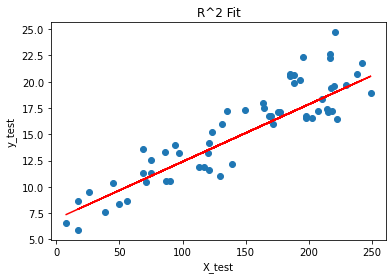

In [ ]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.plot(X_test, y_test_pred, 'r')
plt.title("R^2 Fit")
plt.show()

The R² value by using the above code = 0.792

If we can remember from the training data, the R² value = 0.815

Since the R² value on test data is within 5% of the R² value on training data, we can conclude that the model is pretty stable. Which means, what the model has learned on the training set can generalize on the unseen test set.